# **Market Basket Analysis (Association Rules) Groceries Dataset**

# **Pradytha Galuh Putranti 2304220013**

# **DATASET** https://www.kaggle.com/code/heeraldedhia/market-basket-analysis-using-apriori-algorithm#Import-the-dataset

In [13]:
# ===== SUPPRESS WARNINGS =====
import warnings
warnings.filterwarnings('ignore')

# Suppress deprecation warnings
import os
os.environ['PYTHONWARNINGS'] = 'ignore::DeprecationWarning'

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [4]:
!pip install mlxtend -q

In [5]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [15]:
data = pd.read_excel('Groceries_dataset.xlsx')

In [16]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,2015-05-01 00:00:00,whole milk
2,2300,19-09-2015,pip fruit
3,1187,2015-12-12 00:00:00,other vegetables
4,3037,2015-01-02 00:00:00,whole milk


In [21]:
print(data.head())
print(f"\nJumlah baris: {len(data)}")
print(f"Jumlah kolom: {len(data.columns)}")

   Member_number                 Date   itemDescription
0           1808           21-07-2015    tropical fruit
1           2552  2015-05-01 00:00:00        whole milk
2           2300           19-09-2015         pip fruit
3           1187  2015-12-12 00:00:00  other vegetables
4           3037  2015-01-02 00:00:00        whole milk

Jumlah baris: 38765
Jumlah kolom: 3


In [22]:
grouped_data = data.groupby(['Member_number','Date'])['itemDescription'].apply(list)
grouped_data

Member_number  Date               
1000           15-03-2015             [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                             [whole milk, pastry, salty snack]
               24-07-2015                                [canned beer, misc. beverages]
               25-11-2015                                   [sausage, hygiene articles]
               27-05-2015                                    [soda, pickled vegetables]
                                                            ...                        
4999           24-01-2015             [tropical fruit, berries, other vegetables, yo...
               26-12-2015                                        [bottled water, herbs]
5000           2014-09-03 00:00:00                      [fruit/vegetable juice, onions]
               2015-10-02 00:00:00         [soda, root vegetables, semi-finished bread]
               16-11-2014                              [bottled beer, other vegetables]
Name: itemDescription, Length: 14963, dtype: object

In [24]:
# Convert to list of lists for Apriori processing
transactions = grouped_data.tolist()

# Encode transactions for Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns = te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# Generate association rules dengan confidence minimum 0.1 (10%)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Tampilkan hasilnya
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730
1,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,1.0,-0.003404,0.964550,-0.214986,0.055000,-0.036752,0.107711
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,1.0,-0.003707,0.956636,-0.260917,0.047776,-0.045329,0.096694
3,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317


In [29]:
# Extracting the top 10 items by support from the frequent itemsets afer applying Apriori
top_items_by_support = frequent_itemsets.sort_values(by="support", ascending=False).head(10)
top_items_by_support[['itemsets', 'support']]

,itemsets,support
62,(whole milk),0.157923
40,(other vegetables),0.122101
46,(rolls/buns),0.110005
52,(soda),0.097106
63,(yogurt),0.085879
47,(root vegetables),0.069572
57,(tropical fruit),0.067767
5,(bottled water),0.060683
49,(sausage),0.060349
15,(citrus fruit),0.053131


In [30]:
top_items_by_support['itemsets'].apply(lambda x: ', '.join(list(x)))

,itemsets
62,whole milk
40,other vegetables
46,rolls/buns
52,soda
63,yogurt
47,root vegetables
57,tropical fruit
5,bottled water
49,sausage
15,citrus fruit


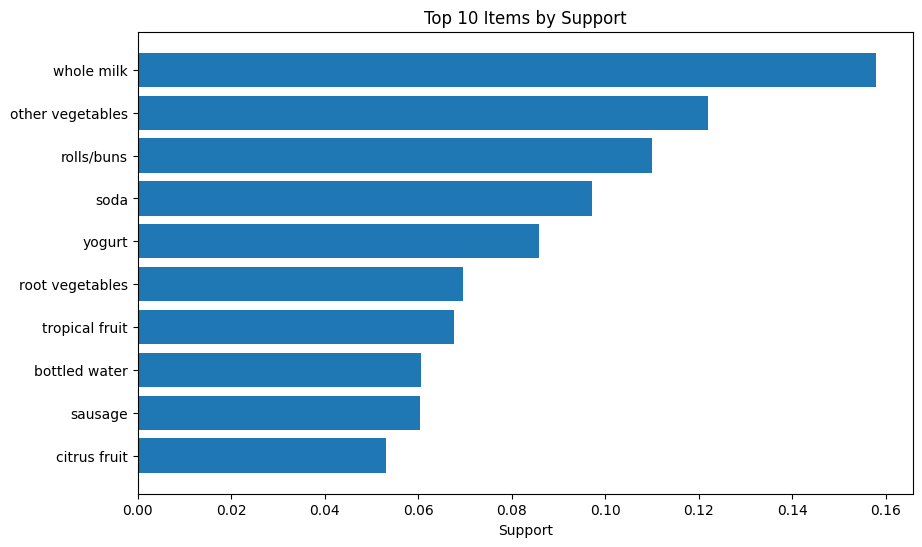

In [31]:
# Plotting the top 10 items by support from the frequent itemsets
plt.figure(figsize=(10, 6))
plt.barh(top_items_by_support['itemsets'].apply(lambda x: ', '.join(list(x))), top_items_by_support['support'])
plt.xlabel('Support')
plt.title('Top 10 Items by Support')
plt.gca().invert_yaxis()
plt.show()

In [32]:
# Extracting the top 10 rules by confindence
top_rules_by_confidence = rules.sort_values(by="confidence", ascending=False).head(10)

# Displaying the top 10 items by confidence
top_rules_by_confidence[['antecedents', 'consequents', 'confidence']]

,antecedents,consequents,confidence
3,(yogurt),(whole milk),0.129961
1,(rolls/buns),(whole milk),0.126974
0,(other vegetables),(whole milk),0.121511
2,(soda),(whole milk),0.119752


In [33]:
# Extracting the top 10 rules by lift
top_rules_by_lift = rules.sort_values(by="lift", ascending=False).head(10)

# Displaying the top 10 items by lift
top_rules_by_lift[['antecedents', 'consequents', 'lift']]

,antecedents,consequents,lift
3,(yogurt),(whole milk),0.822940
1,(rolls/buns),(whole milk),0.804028
0,(other vegetables),(whole milk),0.769430
2,(soda),(whole milk),0.758296


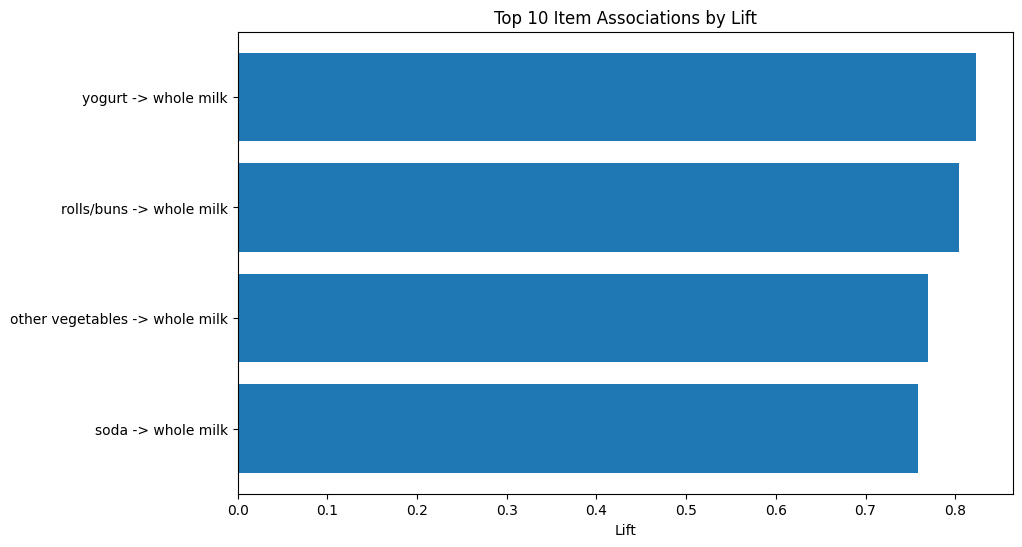

In [34]:
# Plotting the top 10 items by lift
plt.figure(figsize=(10, 6))
plt.barh(['{} -> {}'.format(', '.join(map(str, rule['antecedents'])), ', '.join(map(str, rule['consequents'])))
          for _, rule in top_rules_by_lift.iterrows()],
         top_rules_by_lift['lift'])
plt.xlabel('Lift')
plt.title('Top 10 Item Associations by Lift')
plt.gca().invert_yaxis()
plt.show()